# 朴素贝叶斯分类器

In [19]:
import sys
sys.path.append('../')

In [20]:
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from module.utils import plot_classifier

## 数据导入

In [21]:
input_file = '../data/data_multivar.txt'
X, y = [], []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])

X, y = np.array(X), np.array(y)

In [22]:
cf_gauss = GaussianNB()
cf_gauss.fit(X, y)
y_pred = cf_gauss.predict(X)

准确率为 99.5 %


/Users/whoami/躺平从我做起/ML/Python机器学习经典实例/machine-learning-cook/Chapter2 the classifier/../module/utils.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


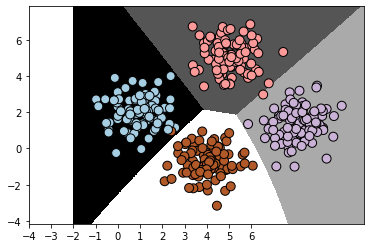

In [23]:
# 计算准确性
acc = 100.0 * (y == y_pred).sum() / X.shape[0]
print('准确率为', acc, '%')
plot_classifier(cf_gauss, X, y)

# 训练set测试set划分

准确率为 98.0 %


/Users/whoami/躺平从我做起/ML/Python机器学习经典实例/machine-learning-cook/Chapter2 the classifier/../module/utils.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


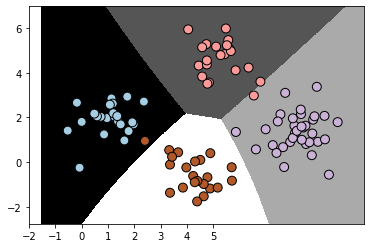

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
cf_new = GaussianNB()
cf_new.fit(X_train, y_train)

# 测试
y_test_pred = cf_new.predict(X_test)
acc = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print('准确率为', acc, '%')

# 画图
plot_classifier(cf_new, X_test, y_test)

# 交叉验证模型准确性

In [25]:
# 计算精度
num_validation = 5
accuracy = cross_val_score(cf_gauss, X, y, scoring='accuracy', cv=num_validation)
print('精度为', str(100 * accuracy.mean()) + '%')

精度为 99.49999999999999%


In [26]:
# 精度、召回率、F1得分
f1 = cross_val_score(cf_gauss, X, y, scoring='f1_weighted', cv=num_validation)
print('F1为', str(100 * f1.mean()) + '%')

precision = cross_val_score(cf_gauss, X, y, scoring='precision_weighted', cv=num_validation)
print('精度为', str(100 * precision.mean()) + '%')

recall = cross_val_score(cf_gauss, X, y, scoring='recall_weighted', cv=num_validation)
print('召回率为', str(100 * recall.mean()) + '%')

F1为 99.49968730456537%
精度为 99.52380952380952%
召回率为 99.49999999999999%
